In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("housing.csv")

In [4]:
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

x= data.drop(['median_house_value'], axis=1)
y= data['median_house_value']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [10]:
train_data=x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

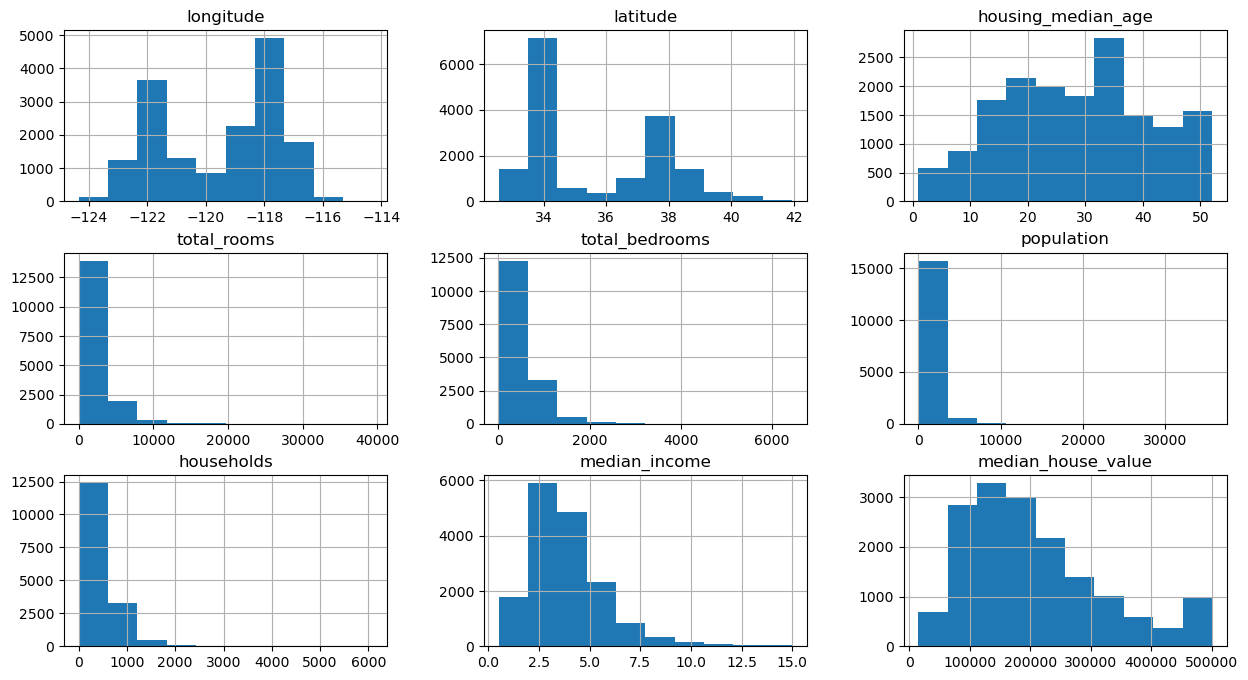

In [11]:
train_data.hist(figsize=(15,8))

<Axes: >

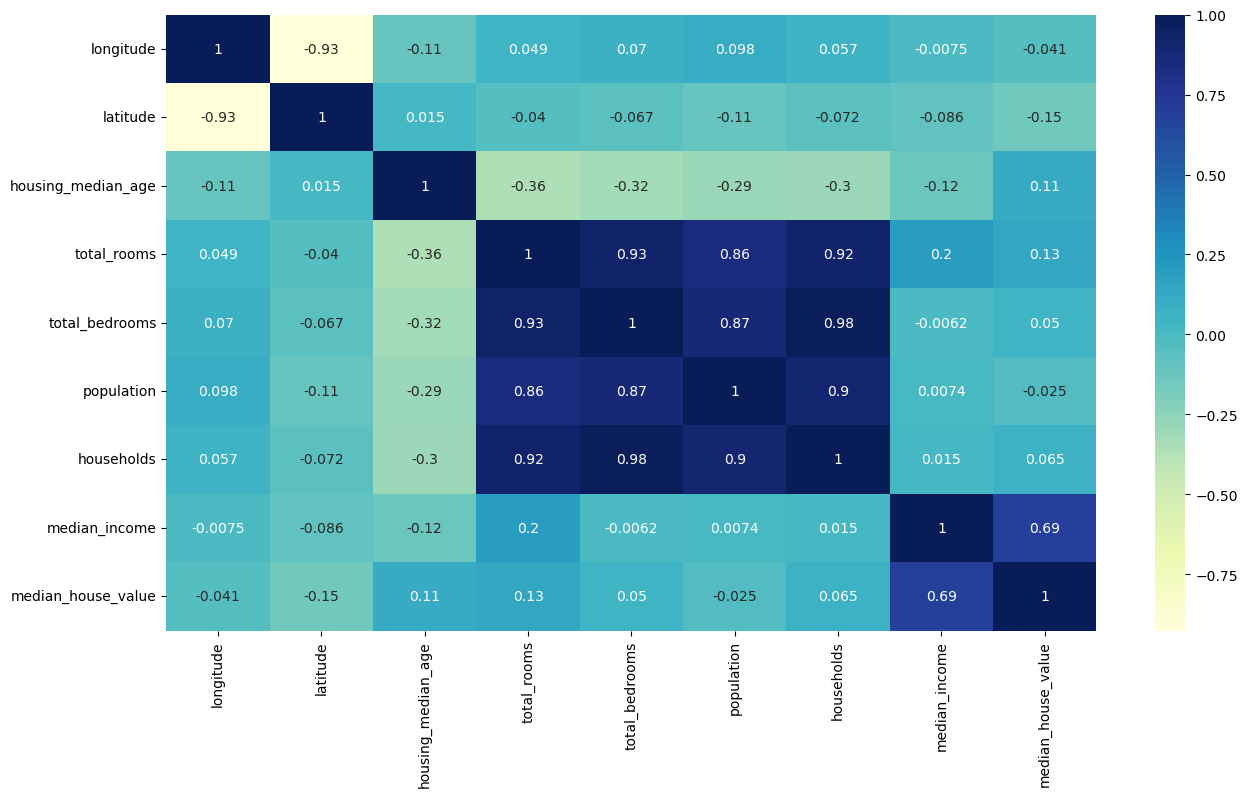

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot =True,cmap="YlGnBu")

In [13]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

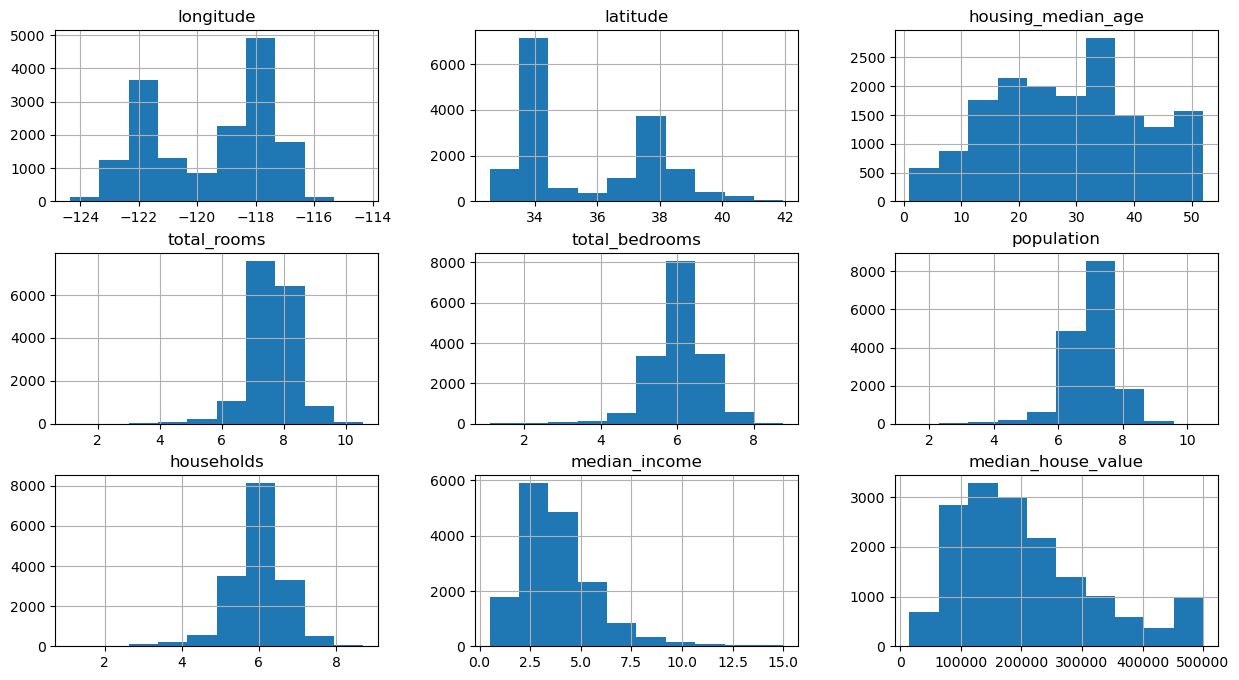

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [16]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1842     -122.29     37.91                40.0     7.643004        5.799093   
4449     -118.21     34.07                31.0     7.282074        6.003887   
2959     -119.04     35.35                31.0     7.382746        5.820083   
20514    -121.52     38.58                24.0     6.844815        5.620401   
16150    -122.48     37.78                52.0     8.022241        6.464588   
...          ...       ...                 ...          ...             ...   
15815    -122.42     37.76                52.0     7.644441        6.190315   
6682     -118.09     34.15                49.0     7.291656        5.560682   
19271    -122.82     38.44                23.0     7.347300        5.468060   
8176     -118.09     33.81                36.0     7.224025        5.525453   
12133    -117.21     33.93                 4.0     9.210640        7.292337   

       population  households  median_income  median_house_value  <1H OCEAN  \
1842     6.680855    5.828946         5.5357            273700.0      False   
4449     7.304516    5.966147         2.3859            153100.0       True   
2959     6.706862    5.730100         2.5644             73000.0      False   
20514    6.232448    5.537334         1.6420             32500.0      False   
16150    7.264030    6.431331         3.4883            337200.0      False   
...           ...         ...            ...                 ...        ...   
15815    6.987490    6.192362         2.6803            490000.0      False   
6682     6.535241    5.564520         4.3452            260100.0      False   
19271    6.320768    5.497168         4.6792            304700.0       True   
8176     6.502790    5.552960         5.0795            243300.0       True   
12133    8.601534    7.242798         5.0223            152600.0      False   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
1842    False   False      True       False  
4449    False   False     False       False  
2959     True   False     False       False  
20514    True   False     False       False  
16150   False   False      True       False  
...       ...     ...       ...         ...  
15815   False   False      True       False  
6682     True   False     False       False  
19271   False   False     False       False  
8176    False   False     False       False  
12133    True   False     False       False  

[16346 rows x 14 columns]

<Axes: >

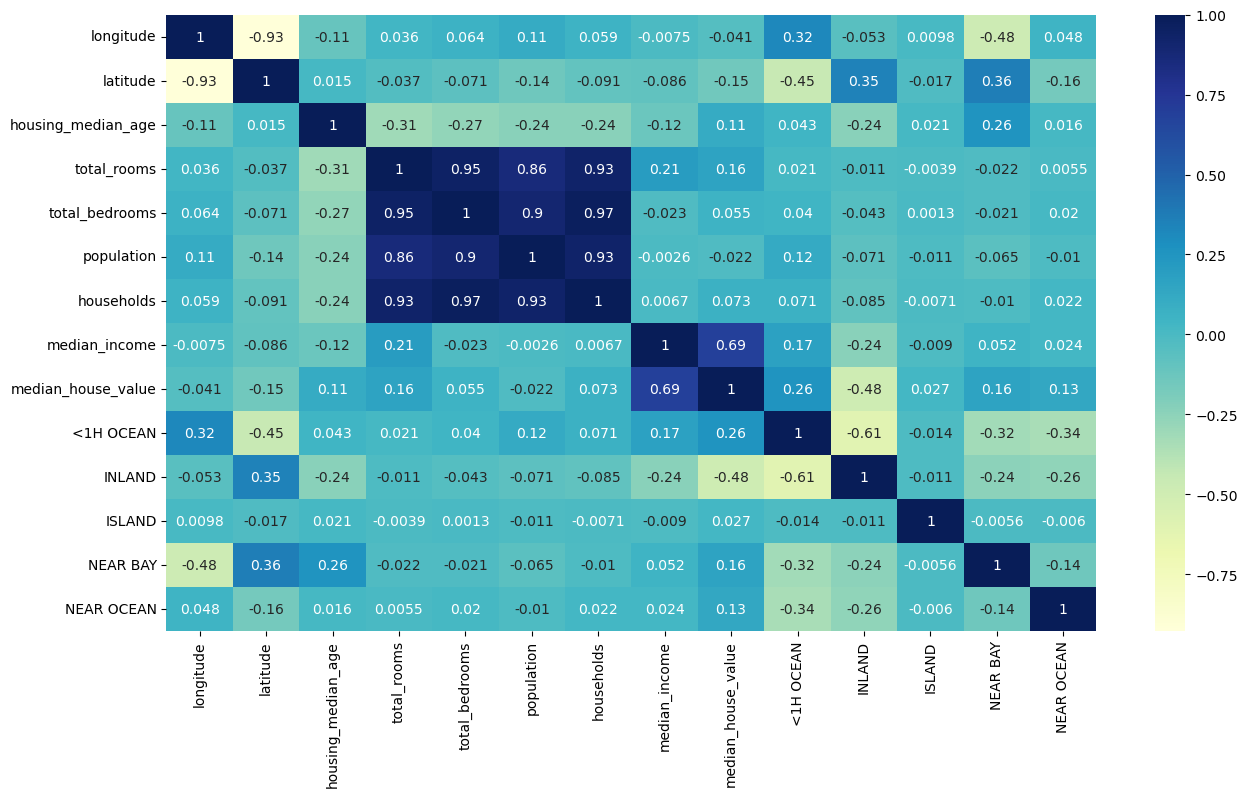

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot =True,cmap="YlGnBu")

In [18]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/train_data['households']

<Axes: >

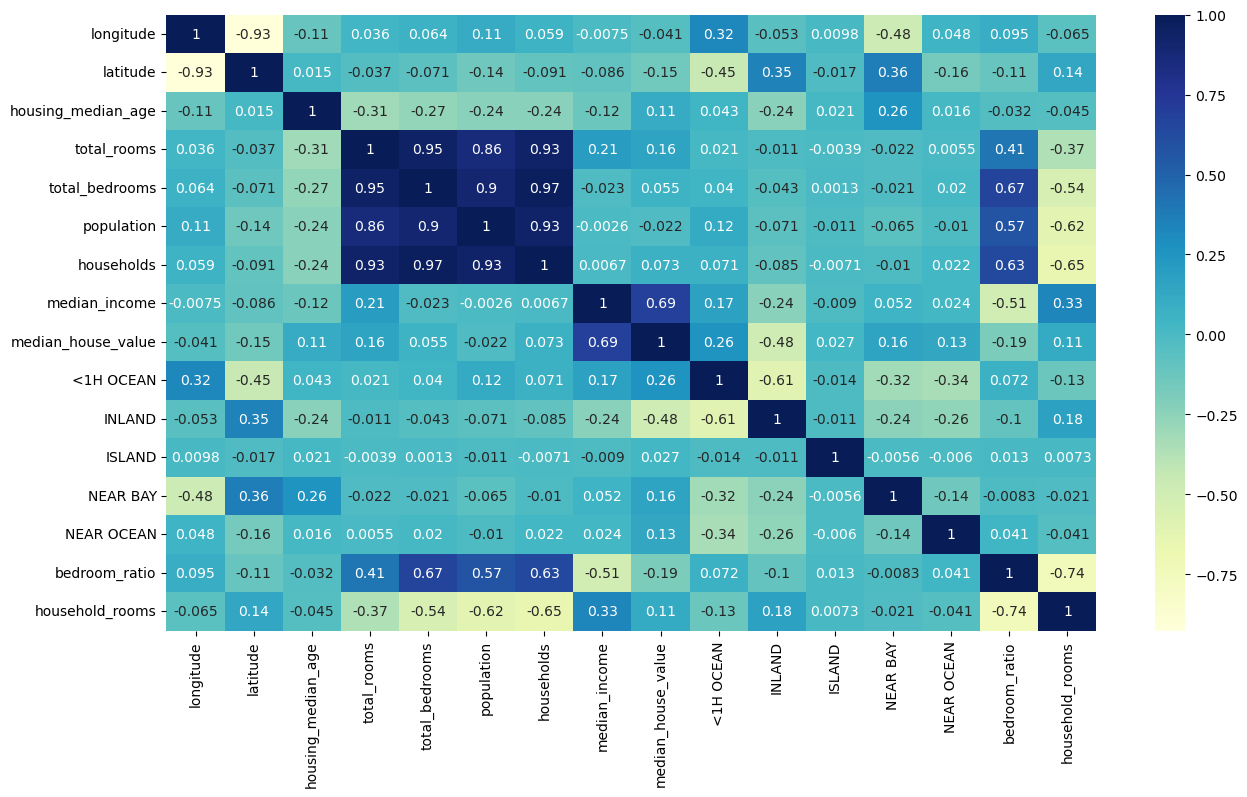

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot =True,cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train, y_train =train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s =scaler.fit_transform(x_train)

reg=LinearRegression()

reg.fit(x_train_s ,y_train)

In [ ]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']



In [25]:
x_test, y_test =test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [26]:
x_test_s =scaler.transform(x_test)

In [27]:
reg.score(x_test_s,y_test)

0.6699834746372155

In [ ]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(x_train_s,y_train)

In [ ]:
forest.score(x_test_s,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
forest = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

# Apply Grid Search
grid_search = GridSearchCV(
    forest,                  # estimator
    param_grid,              # parameter grid
    cv=5,                    # 5-fold cross-validation
    scoring="neg_mean_squared_error",
    return_train_score=True
)

# Fit the model (make sure x_train_s and y_train are defined)
grid_search.fit(x_train_s, y_train)


In [ ]:
best_forest=grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(x_test)  # Or use grid_search.best_estimator_.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Prediction Accuracy")
plt.show()
